# Decomposition/Factorization

Why is it useful to express something as a few parts multiplied together?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

In [2]:
# at what points does y=0?
#y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)

<AxesSubplot:xlabel='x', ylabel='y'>

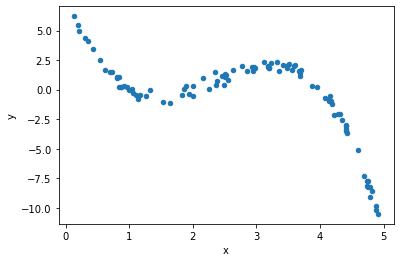

In [3]:
pd.DataFrame({"x": x, "y": y+noise}).plot.scatter(x="x", y="y")

# Matrix Multiplication

In [4]:
A = np.random.normal(size=(5, 7))
B = np.random.normal(size=(7, 14))
C = np.random.normal(size=(14, 123))
D = np.random.normal(size=(123, 56))
print(A.shape, B.shape, C.shape, D.shape)

(5, 7) (7, 14) (14, 123) (123, 56)


In [5]:
Y = A @ B @ C @ D
Y.shape

(5, 56)

# Decomposition with PCA 

In [6]:
df = pd.DataFrame(make_blobs(centers=3, random_state=320)[0], columns=["A", "B"])
df["C"] = df["A"] * 2
df["D"] = df["A"] - df["B"]
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [7]:
df.mean()

A     6.079707
B    -1.523008
C    12.159413
D     7.602715
dtype: float64

In [8]:
p = PCA()
W = p.fit_transform(df) # weights
C = p.components_

In [9]:
p.mean_

array([ 6.0797066 , -1.5230081 , 12.15941319,  7.60271469])

In [10]:
print(W.shape, C.shape)

(100, 4) (4, 4)


In [11]:
df.shape

(100, 4)

In [12]:
print((W@C).shape)

(100, 4)


In [13]:
pd.DataFrame(W@C + p.mean_).head()

,0,1,2,3
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [14]:
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [15]:
# what's cool about W and C
# first columns of W are "most important"
# first rows of C are "most important"

In [16]:
print(W[:, :1].shape, C[:1, :].shape)

(100, 1) (1, 4)


In [17]:
pd.DataFrame(W[:, :1] @ C[:1, :] + p.mean_).head()

,0,1,2,3
0,4.415707,-0.880229,8.831414,5.295936
1,1.903025,0.090383,3.806050,1.812642
2,10.036329,-3.051394,20.072658,13.087723
3,5.011442,-1.110353,10.022883,6.121795
4,5.832180,-1.427392,11.664360,7.259572


In [18]:
W.shape

(100, 4)

In [19]:
p.explained_variance_ratio_.round(3)

array([0.773, 0.227, 0.   , 0.   ])

# Explained Variance

In [20]:
a = np.array([0.9, 1.1, 2.2])
a

array([0.9, 1.1, 2.2])

In [21]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [22]:
a.var()

0.3266666666666667

In [23]:
(a - b).var()

0.12666666666666662

In [24]:
df.values.reshape(-1).var()

42.542575093552266

# Feature Dimensionality Reduction

In [25]:
p = PCA()
W = p.fit_transform(df)
C = p.components_
m = p.mean_

Text(0.5, 0, 'Component')

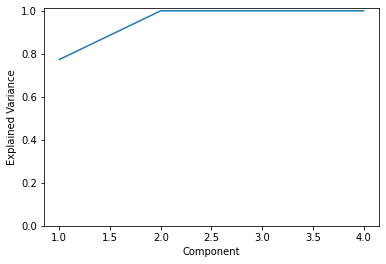

In [26]:
s = pd.Series(p.explained_variance_ratio_.cumsum(), index=range(1,5))
ax = s.plot.line(ylim=0)
ax.set_ylabel("Explained Variance")
ax.set_xlabel("Component")

In [27]:
p = PCA(2) # specify an exact int, or a float indicates how much variance we want to explain
W = p.fit_transform(df)
C = p.components_
m = p.mean_

In [28]:
pd.DataFrame(W).head()

,0,1
0,-4.424802,-3.808312
1,-11.106364,-3.068153
2,10.521197,-0.399549
3,-2.840662,-4.400534
4,-0.658207,5.154923


In [29]:
pd.DataFrame(C)

,0,1,2,3
0,0.376062,-0.145267,0.752124,0.521329
1,-0.200986,-0.724122,-0.401973,0.523135


In [30]:
-4.424802 * C[0] + -3.808312 * C[1] + m

array([ 5.18112571,  1.87745153, 10.36225143,  3.30367418])

In [31]:
df.head(1)

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674


In [32]:
pipe = Pipeline([
    ("pca", PCA(2)),
    ("km", KMeans(3)),
])

pipe.fit(df) # fit PCA, transform using PCA, fit KMeans using output from PCA

groups = pipe.predict(df) # transform using PCA

<AxesSubplot:xlabel='0', ylabel='1'>

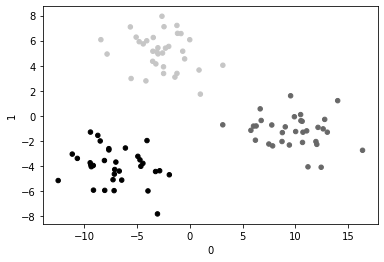

In [34]:
#-1 is white
pd.DataFrame(pipe["pca"].transform(df)).plot.scatter(x=0, y=1, c=groups, vmin=-1)

# Lossy Compression

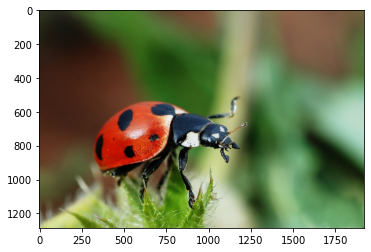

In [35]:
img = plt.imread("bug.jpg")
plt.imshow(img)

In [39]:
img = img.mean(axis=2)
img.shape

(1286, 1920)

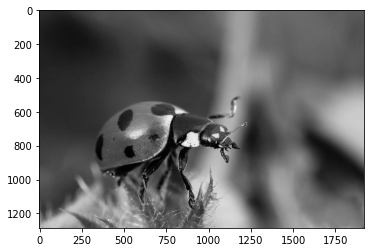

In [42]:
plt.imshow(img, cmap="gray")

In [57]:
p = PCA(0.95)
W = p.fit_transform(img)
C = p.components_
m = p.mean_

In [58]:
# compression ratio
len(img.reshape(-1)) / (len(W.reshape(-1)) + len(C.reshape(-1)) + len(m))

20.483482935408407

In [60]:
C.shape

(37, 1920)

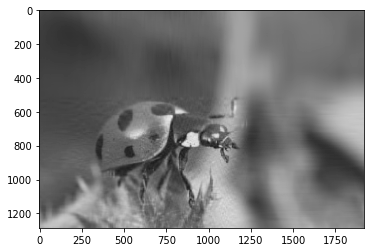

In [59]:
plt.imshow(W@C+m, cmap="gray")

In [62]:
with open("img1.npz", "wb") as f:
    np.savez(f, img)

In [63]:
with open("img2.npz", "wb") as f:
    np.savez(f, W, C, m)

In [64]:
with np.load("img2.npz") as f:
    W, C, m = f.values()

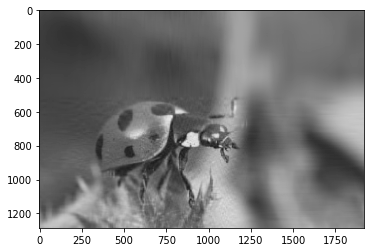

In [65]:
plt.imshow(W@C+m, cmap="gray")

In [68]:
!ls -lh

total 29M
-rw-rw-r-- 1 trh trh 285K Apr 30 19:21 bug.jpg
-rw-rw-r-- 1 trh trh 7.1M May  3 19:20 img.npz
-rw-rw-r-- 1 trh trh  19M May  4 14:26 img1.npz
-rw-rw-r-- 1 trh trh 943K May  4 14:27 img2.npz
-rw-rw-r-- 1 trh trh 367K May  4 14:26 lec1.ipynb
-rw-rw-r-- 1 trh trh 156K May  2 16:48 lec2.ipynb
-rw-rw-r-- 1 trh trh 416K May  3 19:22 starter-Copy1.ipynb
-rw-rw-r-- 1 trh trh 156K Apr 30 19:21 starter.ipynb
